In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/road_accident_dataset.csv')


### 1- Data Understanding


In [9]:
df.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [10]:
df.tail()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030
131999,USA,2022,November,Tuesday,Morning,Urban,Street,Windy,253.531380,3,...,4,28.037108,7662.853082,Snow-covered,Speeding,6,3240.358544,27765.168982,Asia,2949.568694


### 2- Check for Datatypes

In [11]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
Dtypes,object,int64,object,object,object,object,object,object,float64,int64,...,int64,float64,float64,object,object,int64,float64,float64,object,float64
Num_Uniqe,10,25,12,7,4,2,3,5,132000,4,...,5,132000,132000,4,5,10,132000,132000,5,132000


### 3- Check for Null Values

In [12]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4- Handle Outliers

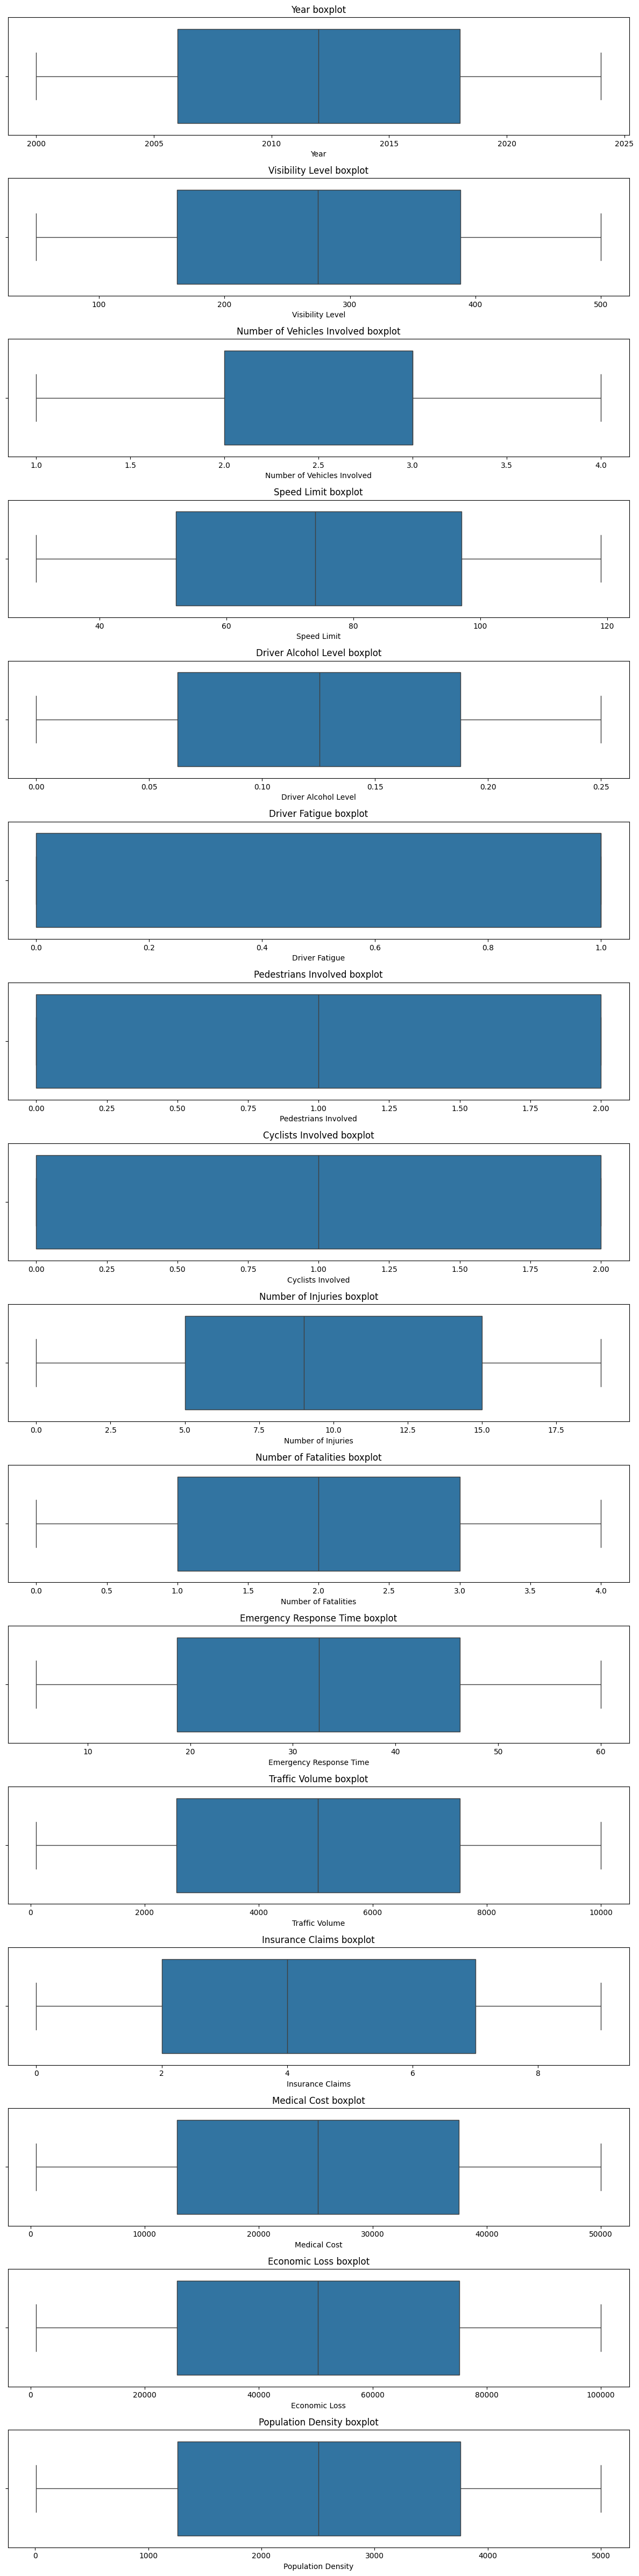

In [14]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(12, 3 * len(num_cols)))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")

plt.tight_layout()
plt.show()


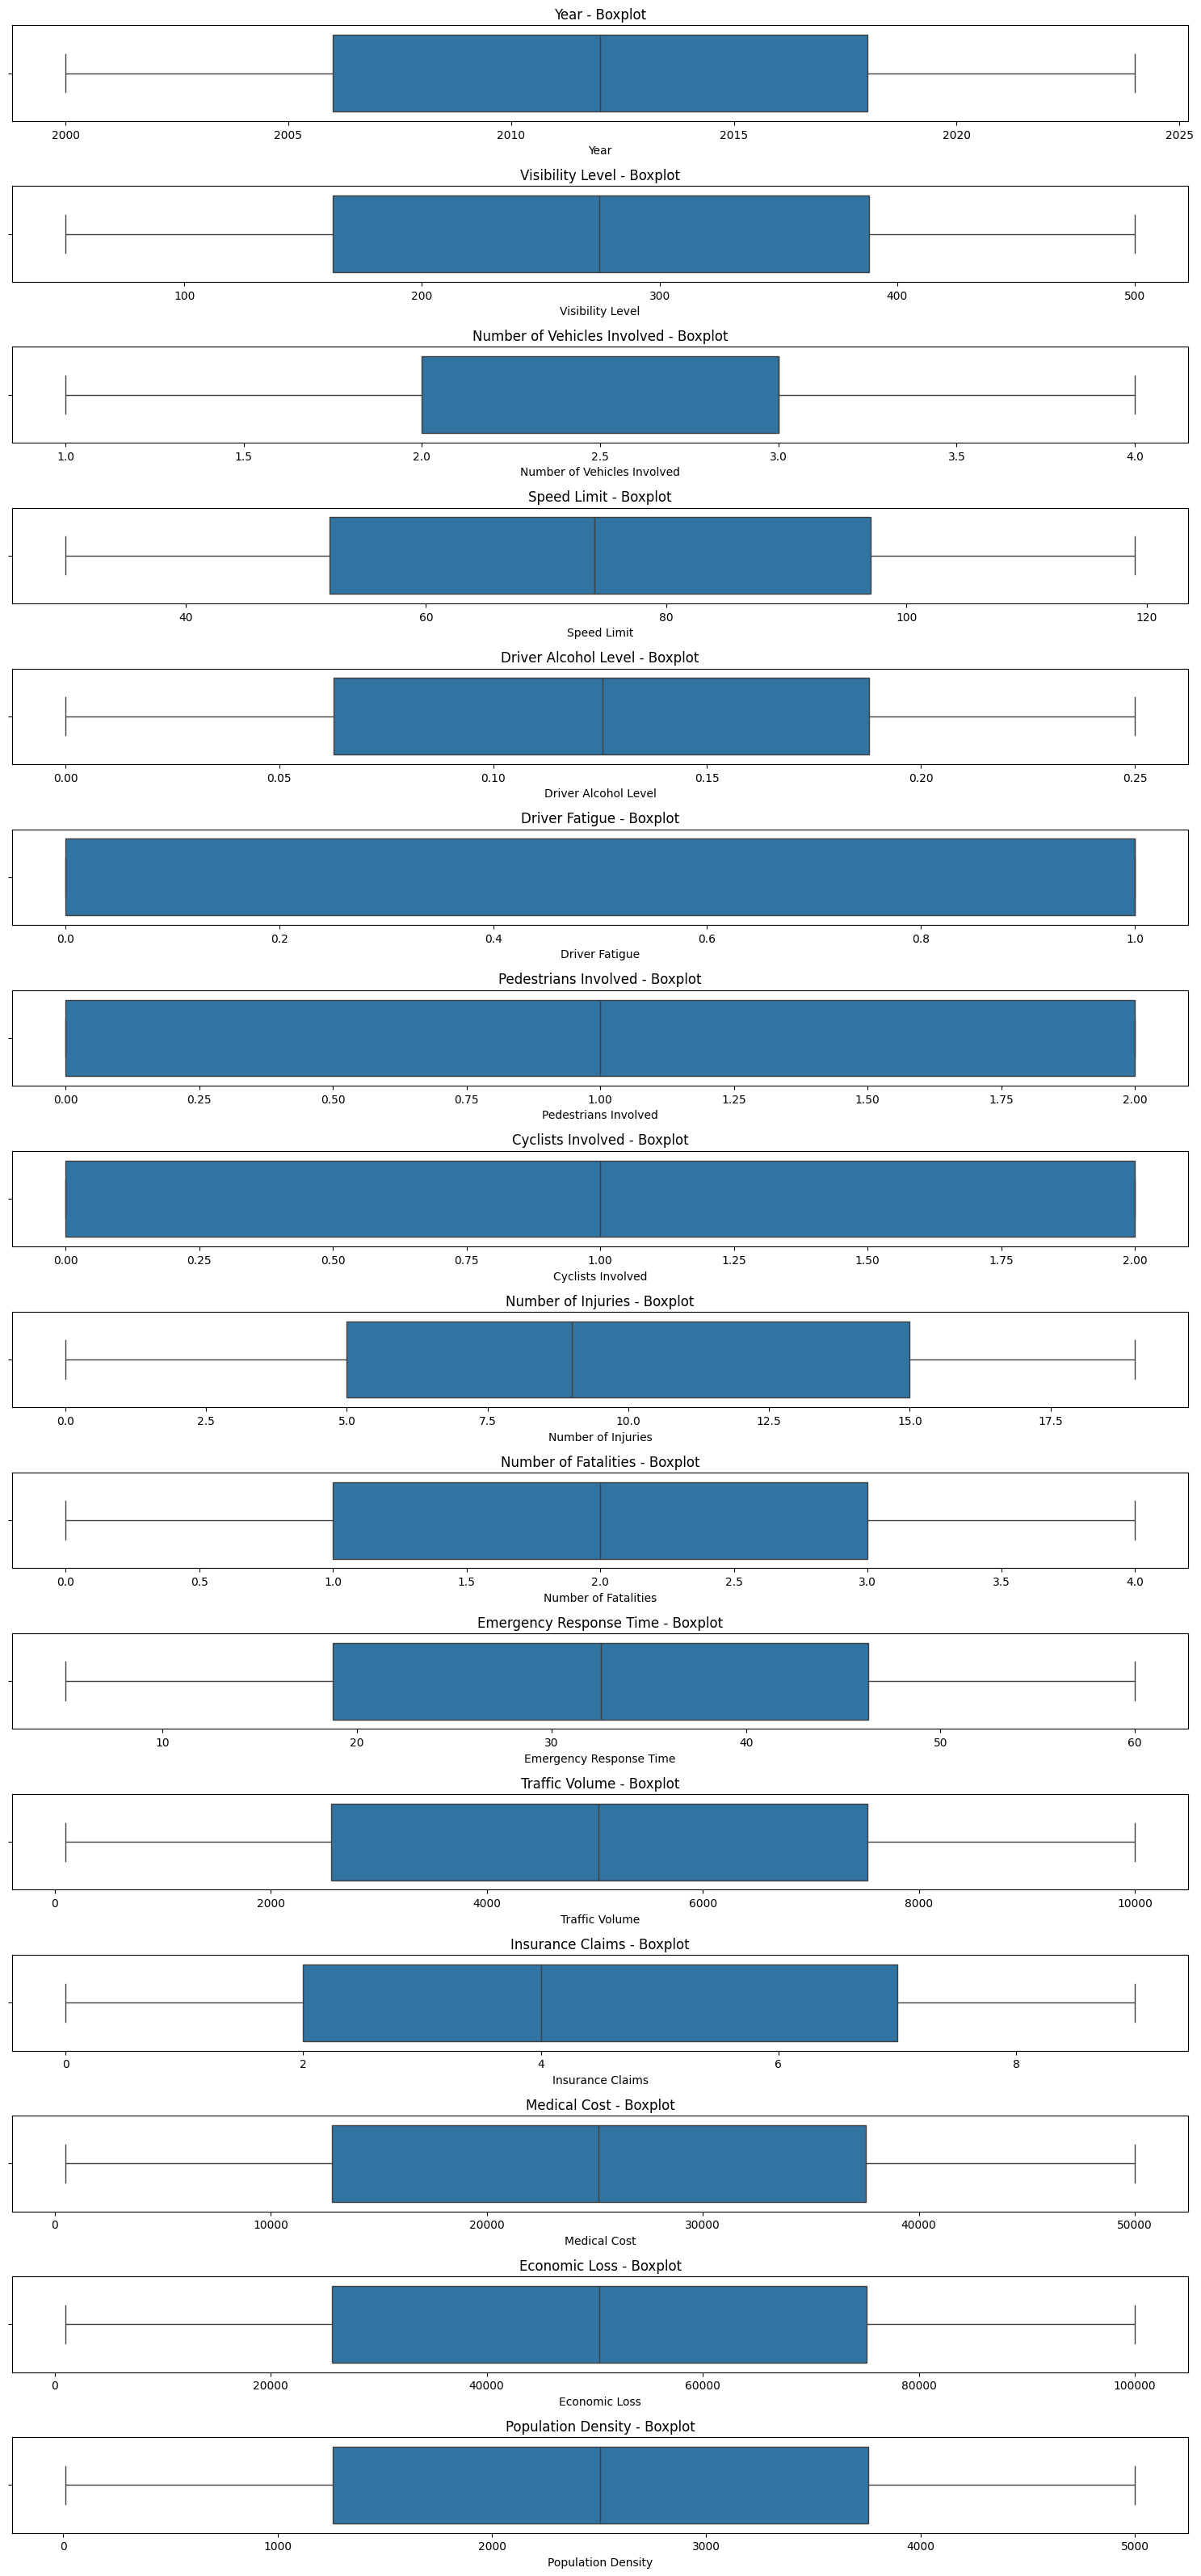

In [15]:
num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, len(num_cols) * 2))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()


##5-Check For Dublicates

In [16]:
df.duplicated().sum()

np.int64(0)

##6-Make Sure Data is Standardized(no typos)

In [17]:
cat_cols = [
    'Country',
    'Year',
    'Month',
    'Day of Week',
    'Time of Day',
    'Urban/Rural',
    'Road Type',
    'Weather Conditions',
    'Visibility Level',
    'Road Condition',
    'Accident Cause',
    'Region'
]
for col in cat_cols:
    print(f"\n--- Value Counts for: {col} ---")
    print(df[col].value_counts())




--- Value Counts for: Country ---
Country
Canada       13349
Australia    13345
Brazil       13318
Germany      13293
India        13238
UK           13186
USA          13125
China        13121
Japan        13049
Russia       12976
Name: count, dtype: int64

--- Value Counts for: Year ---
Year
2002    5433
2008    5409
2016    5377
2011    5356
2014    5351
2015    5331
2003    5327
2012    5327
2020    5308
2007    5307
2005    5302
2009    5298
2018    5295
2000    5280
2017    5278
2001    5263
2021    5243
2019    5243
2023    5242
2013    5220
2004    5180
2022    5175
2006    5156
2024    5155
2010    5144
Name: count, dtype: int64

--- Value Counts for: Month ---
Month
May          11158
June         11122
March        11072
February     11064
April        11063
September    11047
July         11000
October      10986
January      10952
December     10909
November     10836
August       10791
Name: count, dtype: int64

--- Value Counts for: Day of Week ---
Day of Week
Tuesday  

#6- Inconsistency between the Country and Region columns

In [18]:
country_to_region = {
    'USA': 'North America',
    'UK': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Russia': 'Asia',
    'Australia': 'Australia',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia'
}
df['Region'] = df['Country'].map(country_to_region)
print("Updated Country to Region Frequency Table:\n")
print(pd.crosstab(df['Country'], df['Region'], margins=True, margins_name='Total'))

Updated Country to Region Frequency Table:

Region      Asia  Australia  Europe  North America  South America   Total
Country                                                                  
Australia      0      13345       0              0              0   13345
Brazil         0          0       0              0          13318   13318
Canada         0          0       0          13349              0   13349
China      13121          0       0              0              0   13121
Germany        0          0   13293              0              0   13293
India      13238          0       0              0              0   13238
Japan      13049          0       0              0              0   13049
Russia     12976          0       0              0              0   12976
UK             0          0   13186              0              0   13186
USA            0          0       0          13125              0   13125
Total      52384      13345   26479          26474          13318  1